# Análisis Descriptivo Base Fraude 

## Importación de librería

In [1]:
import pandas as pd
import numpy as np

# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Librería para test estadíscos de correlaciones
from scipy.stats import pointbiserialr, chi2_contingency

## Lectura de datos

In [ ]:
# Se importa la base de datos suministrada
file_path=r"..\data\MercadoLibre.csv"
df_datos = pd.read_csv(
    file_path,
    sep=',',
    decimal='.'
)

# Se corrige el formato de los valores del campo Monto a números
for col in ['Monto', 'Q', 'R']:
    df_datos[col]=df_datos[col].apply(lambda valor: float(str(valor).replace(',','')))

# Entendimiento de la estructura de la base y preview
print(df_datos.info())
df_datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  float64
 17  R       16880 non-null  float64
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  float64
 20  Fraude  16880 non-null  int64  
dtypes: float64(8), int64(12), object(1)

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1


In [10]:
df_datos

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,UY,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,BR,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,BR,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,BR,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,BR,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


In [5]:
# Entendimiento de la variable respuesta
df_datos['Fraude'].value_counts()

Fraude
0    12269
1     4611
Name: count, dtype: int64

In [6]:
# Entendimiento de la variable respuesta
df_datos['Fraude'].value_counts(normalize=True).round(2)

Fraude
0    0.73
1    0.27
Name: proportion, dtype: float64

In [ ]:
# Distribución del Monto por tipo de fraude
df_datos.groupby('Fraude').agg(
    monto_total=('Monto', 'sum')
)

,monto_total
Fraude,
0,2089628.98
1,642180.14


Contamos con un total de 16.880 registros junto a 21 columnas. En particular la variable objetivo tiene el nombre de Fraude y a las demás se les da por entendido como las potenciales variables explicativas. 

Llaman la atención los campos 'C' y 'K' al tener presencia de nulos, en particular 'K' con un 76% de datos nulos. Además, el campo 'J' en principio es el directamente entendido como categórica y parece indicar las iniciales de los países donde participa Mercado Libre, teniendo su pareto en los valores AR y BR :)

## Análisis distribucional y estudio de relaciones entre variables
 

In [3]:
# Entendiendo cómo se encuentran distribuidas las variables
df_datos.describe()

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,Monto,Fraude
count,16880.000000,16880.000000,13683.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,4016.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000
mean,0.309242,7.645379,39235.339984,0.198697,0.433709,0.015878,0.005200,0.050296,0.144076,0.682099,0.432346,1.544135,1.091765,0.009419,1.630865,8.445394,1.994921,29.127720,161.837033,0.273164
std,1.094064,4.686494,91045.252879,2.042959,1.537297,0.098730,0.059419,0.531060,0.824761,0.153264,0.663860,1.022385,0.408081,0.116606,1.088286,74.367729,38.222485,26.510548,275.499961,0.445597
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.050000,0.000000
25%,0.000000,4.000000,1172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.560000,33.807500,0.000000
50%,0.000000,7.000000,6173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.640000,81.645000,0.000000
75%,0.000000,11.000000,26888.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,39.212500,193.440000,1.000000
max,30.000000,20.000000,617324.000000,180.000000,45.000000,1.000000,1.000000,21.000000,24.000000,0.990000,7.000000,13.000000,10.000000,3.000000,41.000000,2274.670000,2025.720000,99.970000,12538.440000,1.000000


De acuerto a la tabla anterior podemos entender sobre qué rango de valores juegan cada una de las variables, además:

- Todos los campos, excepto 'B', 'K' (en sus valores no nulos) y 'S', son claramente sesgados a la derecha, pues solo su máximo valor es distinto y mayor que los otros observados en los cuantiles. 

- Bajo el mismo conjunto de variables, pero sin tener en cuenta a los campos 'C', 'F', 'G' y Monto, podemos notar que son variables discretas, posiblemente se refieran a conteo de enventos particulares.

- 'B' y 'S' presentan en sus valores datos negativos registrados como -1, en principio parecen ser errores. Por tal motivo se transformarán en datos nulls y se imputaran por la mediana dependiendo de la destribución de la población que comete o no fraude.

### Corrección de valores negativos para los campos 'B', 'S'

In [4]:
# Corrección de valores negativos en los campos B y S
mediana_B_fraude, mediana_S_fraude=df_datos[df_datos['Fraude']==1]['B'].quantile(.5), df_datos[df_datos['Fraude']==1]['S'].quantile(.5)
mediana_B_no_fraude, mediana_S_no_fraude=df_datos[df_datos['Fraude']==0]['B'].quantile(.5), df_datos[df_datos['Fraude']==0]['S'].quantile(.5)

cols_correccion_negativo=['B', 'S']

for cols in cols_correccion_negativo:
    df_datos[cols]=np.where(
        # Imputación en población que no comete Fraude
        (df_datos[cols]<0)&(df_datos['Fraude']==0),
        mediana_B_no_fraude,
        np.where(
            # Imputación en población que comete Fraude
            (df_datos[cols]<0)&(df_datos['Fraude']==1),
            mediana_B_fraude, 
            df_datos[cols]
        )
    )


In [5]:
# Distribución final después de corrección
df_datos[cols_correccion_negativo].describe()

,B,S
count,16880.000000,16880.000000
mean,7.701718,29.202839
std,4.629230,26.438774
min,1.000000,0.070000
25%,4.000000,9.777500
50%,7.000000,20.640000
75%,11.000000,39.212500
max,20.000000,99.970000


### Impuntación nulos columna C

In [6]:
mediana_C_fraude=df_datos[df_datos['Fraude']==1]['C'].quantile(.5)
mediana_C_no_fraude=df_datos[df_datos['Fraude']==0]['C'].quantile(.5)

df_datos['C']=np.where(
    # Imputación en población que no comete Fraude
    (df_datos['C'].isnull())&(df_datos['Fraude']==0),
    mediana_B_no_fraude,
    np.where(
        # Imputación en población que comete Fraude
        (df_datos['C'].isnull())&(df_datos['Fraude']==1),
        mediana_B_fraude, 
        df_datos['C']
    )
)

## Relación con la variable respuesta Fraude

### Análisis de correlaciones

Se medirá la relación de estas variables con el fraude, para ello se utilizará la correlación de Pearson de punto-biseral usada para medir la correlación cuando una de las variables es binaria. Se construye a partir de la siguiente prueba de hipótesis:

- H0: no hay correlación en la población
- H1: sí hay correlación en la población

In [7]:
# Se seleccionan todas las variables sin datos nulos y numéricas
variables=sorted(df_datos.drop(columns=['K', 'J', 'C']).columns)

correlaciones={}  
for variable in variables:
    if variable != 'Fraude':
        corr, pval = pointbiserialr(df_datos['Fraude'], df_datos[variable])
        correlaciones[variable]=f"Correlación: {corr:.3f}, p-valor: {pval:.4f}"
    
correlaciones

{'A': 'Correlación: 0.034, p-valor: 0.0000',
 'B': 'Correlación: 0.310, p-valor: 0.0000',
 'D': 'Correlación: 0.018, p-valor: 0.0184',
 'E': 'Correlación: 0.026, p-valor: 0.0007',
 'F': 'Correlación: -0.020, p-valor: 0.0087',
 'G': 'Correlación: -0.000, p-valor: 0.9540',
 'H': 'Correlación: 0.064, p-valor: 0.0000',
 'I': 'Correlación: 0.005, p-valor: 0.4939',
 'L': 'Correlación: 0.027, p-valor: 0.0004',
 'M': 'Correlación: 0.104, p-valor: 0.0000',
 'Monto': 'Correlación: -0.050, p-valor: 0.0000',
 'N': 'Correlación: 0.064, p-valor: 0.0000',
 'O': 'Correlación: 0.028, p-valor: 0.0003',
 'P': 'Correlación: 0.141, p-valor: 0.0000',
 'Q': 'Correlación: 0.075, p-valor: 0.0000',
 'R': 'Correlación: 0.036, p-valor: 0.0000',
 'S': 'Correlación: 0.244, p-valor: 0.0000'}

Conclusiones:
- Para los campos 'G' e 'I' no se encuentra evidencia estadística de correlación por lo menos lineal con el fraude (p-valor>0.05).
- El resto de variables presentan evidencia de correlación lineal con el fraude, sin embargo en valores muy débiles.

### Distribución del Fraude por variables

In [8]:
# Separación de variables por su tipo para estudiar la distribución del fraude dependiendo del caso
variable_categorica=['J']
variables_continuas=['B', 'C', 'F', 'G', 'K', 'Q', 'R', 'S', 'Monto']
variables_discretas=df_datos.drop(columns=[*variables_continuas, *variable_categorica]).columns

#### Distribución del Fraude vs J

In [9]:
def tabla_contingencia(df:pd.DataFrame, var1: str, var2:str):
    df_total=pd.crosstab(
        df[var1],
        df[var2],
        margins=True,
        margins_name='Total'
    ).iloc[:, -1]
    
    df_porcentajes=(pd.crosstab(
        df[var1],
        df[var2],
        margins=True,
        margins_name='Total',
        normalize='index'
    )*100).round(1)

    df_resultado=pd.concat([df_porcentajes, df_total], axis=1)
    display(df_resultado.sort_values('Total', ascending=False))

In [14]:
55+26

81

In [13]:
df_datos['J'].value_counts(normalize=True)

J
AR    0.552666
BR    0.262322
MX    0.140166
ES    0.018602
US    0.013626
UY    0.010664
CA    0.000711
GB    0.000474
GT    0.000118
FR    0.000118
UA    0.000059
CL    0.000059
IT    0.000059
PT    0.000059
CH    0.000059
TR    0.000059
KR    0.000059
AU    0.000059
CO    0.000059
Name: proportion, dtype: float64

In [10]:
tabla_contingencia(df_datos, 'J', 'Fraude')

,0,1,Total
J,,,
Total,72.7,27.3,16880
AR,71.9,28.1,9329
BR,75.2,24.8,4428
MX,90.9,9.1,2366
ES,6.1,93.9,314
US,15.2,84.8,230
UY,0.0,100.0,180
CA,100.0,0.0,12
GB,100.0,0.0,8


In [11]:
df_j_reagrupado=df_datos[['J', 'Fraude']].copy()
df_j_reagrupado['J']=np.where(
    df_j_reagrupado['J'].isin(['AR', 'BR']), 
    df_j_reagrupado['J'], 
    'OTROS'
)
tabla_contingencia(df_j_reagrupado, 'J', 'Fraude')

,0,1,Total
J,,,
Total,72.7,27.3,16880
AR,71.9,28.1,9329
BR,75.2,24.8,4428
OTROS,71.6,28.4,3123


#### Distribución del Fraude vs variables discretas o 'conteo'

Para este caso se discretizarán todas estas variables debido a que sus distribuciones sugieren que los valores mayores a 0 son eventos poco probables y la idea es ver si están relacionado a mayores porcentajes de fraudes

In [ ]:
df_variables_discretizadas=df_datos[variables_discretas].copy()

# Se itera sobre todas las variables para hacerlas dummy
for col in variables_discretas[:-1]:
    if col not in ['M', 'N', 'P']:
        df_variables_discretizadas[col]=np.where(df_variables_discretizadas[col]>0, 1, 0)
    else:
        df_variables_discretizadas[col]=np.where(df_variables_discretizadas[col]>1, 1, 0)
df_variables_discretizadas.describe()

,A,D,E,H,I,L,M,N,O,P,Fraude
count,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000
mean,0.156754,0.055983,0.155391,0.016765,0.052251,0.357405,0.327962,0.065936,0.007701,0.360960,0.273164
std,0.363579,0.229897,0.362288,0.128395,0.222540,0.479250,0.469485,0.248178,0.087422,0.480293,0.445597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
for col in variables_discretas:
    if col != 'Fraude':
        print(f"{col} vs Fraude")
        tabla_contingencia(df_variables_discretizadas, col, 'Fraude')
        print("\n==============\n")
    
del df_variables_discretizadas

A vs Fraude


,0,1,Total
A,,,
Total,72.7,27.3,16880
0,73.6,26.4,14234
1,67.8,32.2,2646




D vs Fraude


,0,1,Total
D,,,
Total,72.7,27.3,16880
0,73.2,26.8,15935
1,64.8,35.2,945




E vs Fraude


,0,1,Total
E,,,
Total,72.7,27.3,16880
0,73.2,26.8,14257
1,70.1,29.9,2623




H vs Fraude


,0,1,Total
H,,,
Total,72.7,27.3,16880
0,73.0,27.0,16597
1,51.9,48.1,283




I vs Fraude


,0,1,Total
I,,,
Total,72.7,27.3,16880
0,72.8,27.2,15998
1,71.4,28.6,882




L vs Fraude


,0,1,Total
L,,,
Total,72.7,27.3,16880
0,72.3,27.7,10847
1,73.4,26.6,6033




M vs Fraude


,0,1,Total
M,,,
Total,72.7,27.3,16880
0,76.4,23.6,11344
1,65.1,34.9,5536




N vs Fraude


,0,1,Total
N,,,
Total,72.7,27.3,16880
0,73.5,26.5,15767
1,61.2,38.8,1113




O vs Fraude


,0,1,Total
O,,,
Total,72.7,27.3,16880
0,72.8,27.2,16750
1,54.6,45.4,130




P vs Fraude


,0,1,Total
P,,,
Total,72.7,27.3,16880
0,75.9,24.1,10787
1,67.1,32.9,6093


In [12]:
np.mean([ 32.2,35.2, 30,48.1,29,26,35,39,45,33])-27.3

7.949999999999999

#### Distribución del Fraude vs variables continuas o 'transaccionales'

In [14]:
for col in variables_continuas:
    print(f"{col} vs Fraude")        
    display(df_datos.groupby('Fraude')[col].describe().round(2))
    print("\n==============\n")

B vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,6.82,4.39,1.0,3.0,6.0,10.0,20.0
1,4611.0,10.04,4.44,1.0,7.0,10.0,13.0,20.0




C vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,28960.18,79451.85,0.0,29.0,2578.0,17021.0,570779.0
1,4611.0,39376.74,92676.28,0.0,473.0,5318.0,23219.0,617324.0




F vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,0.02,0.10,0.0,0.0,0.0,0.0,1.0
1,4611.0,0.01,0.09,0.0,0.0,0.0,0.0,1.0




G vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,0.01,0.06,0.0,0.0,0.0,0.0,1.0
1,4611.0,0.01,0.06,0.0,0.0,0.0,0.0,1.0




K vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,2563.0,0.71,0.15,0.14,0.60,0.72,0.83,0.99
1,1453.0,0.63,0.14,0.12,0.54,0.63,0.73,0.98




Q vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,5.01,43.68,0.0,0.0,0.0,0.0,1321.29
1,4611.0,17.59,122.71,0.0,0.0,0.0,0.0,2274.67




R vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,1.15,21.84,0.0,0.0,0.0,0.0,919.84
1,4611.0,4.24,63.82,0.0,0.0,0.0,0.0,2025.72




S vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,25.25,23.94,0.07,8.04,17.92,33.17,99.91
1,4611.0,39.71,29.71,0.17,15.68,29.74,59.50,99.97




Monto vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,170.32,267.80,0.05,33.40,87.98,202.75,5831.16
1,4611.0,139.27,293.85,1.58,34.55,70.28,159.32,12538.44


### Construcción Base de Datos Final

In [59]:
matriz_datos=df_datos.drop(columns=['L', 'I', 'F', 'G', 'K']).copy()

matriz_datos['J']=np.where(
    matriz_datos['J'].isin(['AR', 'BR']), 
    matriz_datos['J'], 
    'OTROS'
)

variables_discretas=['A', 'D', 'E', 'H', 'M', 'N', 'O', 'P', 'Fraude']
for col in variables_discretas[:-1]:
    if col not in ['M', 'N', 'P']:
        matriz_datos[col]=np.where(matriz_datos[col]>0, 1, 0)
    else:
        matriz_datos[col]=np.where(matriz_datos[col]>1, 1, 0)


variables_continuas=['B', 'C', 'Q', 'R', 'S', 'Monto']
for col in variables_continuas:
    matriz_datos[col]=np.sqrt(matriz_datos[col])


print(matriz_datos.info())
matriz_datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int32  
 1   B       16880 non-null  float64
 2   C       16880 non-null  float64
 3   D       16880 non-null  int32  
 4   E       16880 non-null  int32  
 5   H       16880 non-null  int32  
 6   J       16880 non-null  object 
 7   M       16880 non-null  int32  
 8   N       16880 non-null  int32  
 9   O       16880 non-null  int32  
 10  P       16880 non-null  int32  
 11  Q       16880 non-null  float64
 12  R       16880 non-null  float64
 13  S       16880 non-null  float64
 14  Monto   16880 non-null  float64
 15  Fraude  16880 non-null  int64  
dtypes: float64(6), int32(8), int64(1), object(1)
memory usage: 1.5+ MB
None


,A,B,C,D,E,H,J,M,N,O,P,Q,R,S,Monto,Fraude
0,0,3.162278,224.180731,0,0,0,OTROS,1,0,0,1,0.0,0.0,2.692582,6.124541,1
1,0,3.162278,170.334964,0,0,0,OTROS,0,0,0,1,0.0,0.0,3.414674,2.860070,1
2,0,2.645751,9.591663,0,1,0,OTROS,1,0,0,1,0.0,0.0,9.325771,3.736308,1
3,1,4.000000,224.207493,0,0,0,OTROS,1,0,0,1,0.0,0.0,1.584298,9.678326,1
4,0,2.828427,90.443352,0,0,0,OTROS,0,0,0,0,0.0,0.0,5.095096,11.636151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,1.732051,251.598887,0,1,0,BR,0,0,0,0,0.0,0.0,9.259050,11.496521,1
16876,0,3.464102,28.722813,0,0,0,BR,0,0,0,1,0.0,0.0,3.535534,5.132251,1
16877,1,1.732051,284.722672,0,0,0,BR,0,0,0,0,0.0,0.0,4.915282,13.986779,1
16878,0,3.000000,631.167173,0,0,0,BR,1,0,0,0,0.0,0.0,5.385165,6.080296,1


In [60]:
for col in variables_continuas:
    print(f"{col} vs Fraude")        
    display(matriz_datos.groupby('Fraude')[col].describe().round(2))
    print("\n==============\n")

B vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,2.46,0.88,1.0,1.73,2.45,3.16,4.47
1,4611.0,3.08,0.76,1.0,2.65,3.16,3.61,4.47




C vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,99.54,138.04,0.0,5.39,50.77,130.46,755.5
1,4611.0,124.57,154.48,0.0,21.75,72.92,152.38,785.7




Q vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,0.34,2.21,0.0,0.0,0.0,0.0,36.35
1,4611.0,0.88,4.10,0.0,0.0,0.0,0.0,47.69




R vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,0.07,1.07,0.0,0.0,0.0,0.0,30.33
1,4611.0,0.19,2.05,0.0,0.0,0.0,0.0,45.01




S vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,4.49,2.26,0.26,2.84,4.23,5.76,10.0
1,4611.0,5.83,2.40,0.41,3.96,5.45,7.71,10.0




Monto vs Fraude


,count,mean,std,min,25%,50%,75%,max
Fraude,,,,,,,,
0,12269.0,11.05,6.95,0.22,5.78,9.38,14.24,76.36
1,4611.0,10.05,6.18,1.26,5.88,8.38,12.62,111.98


L I F G K no van



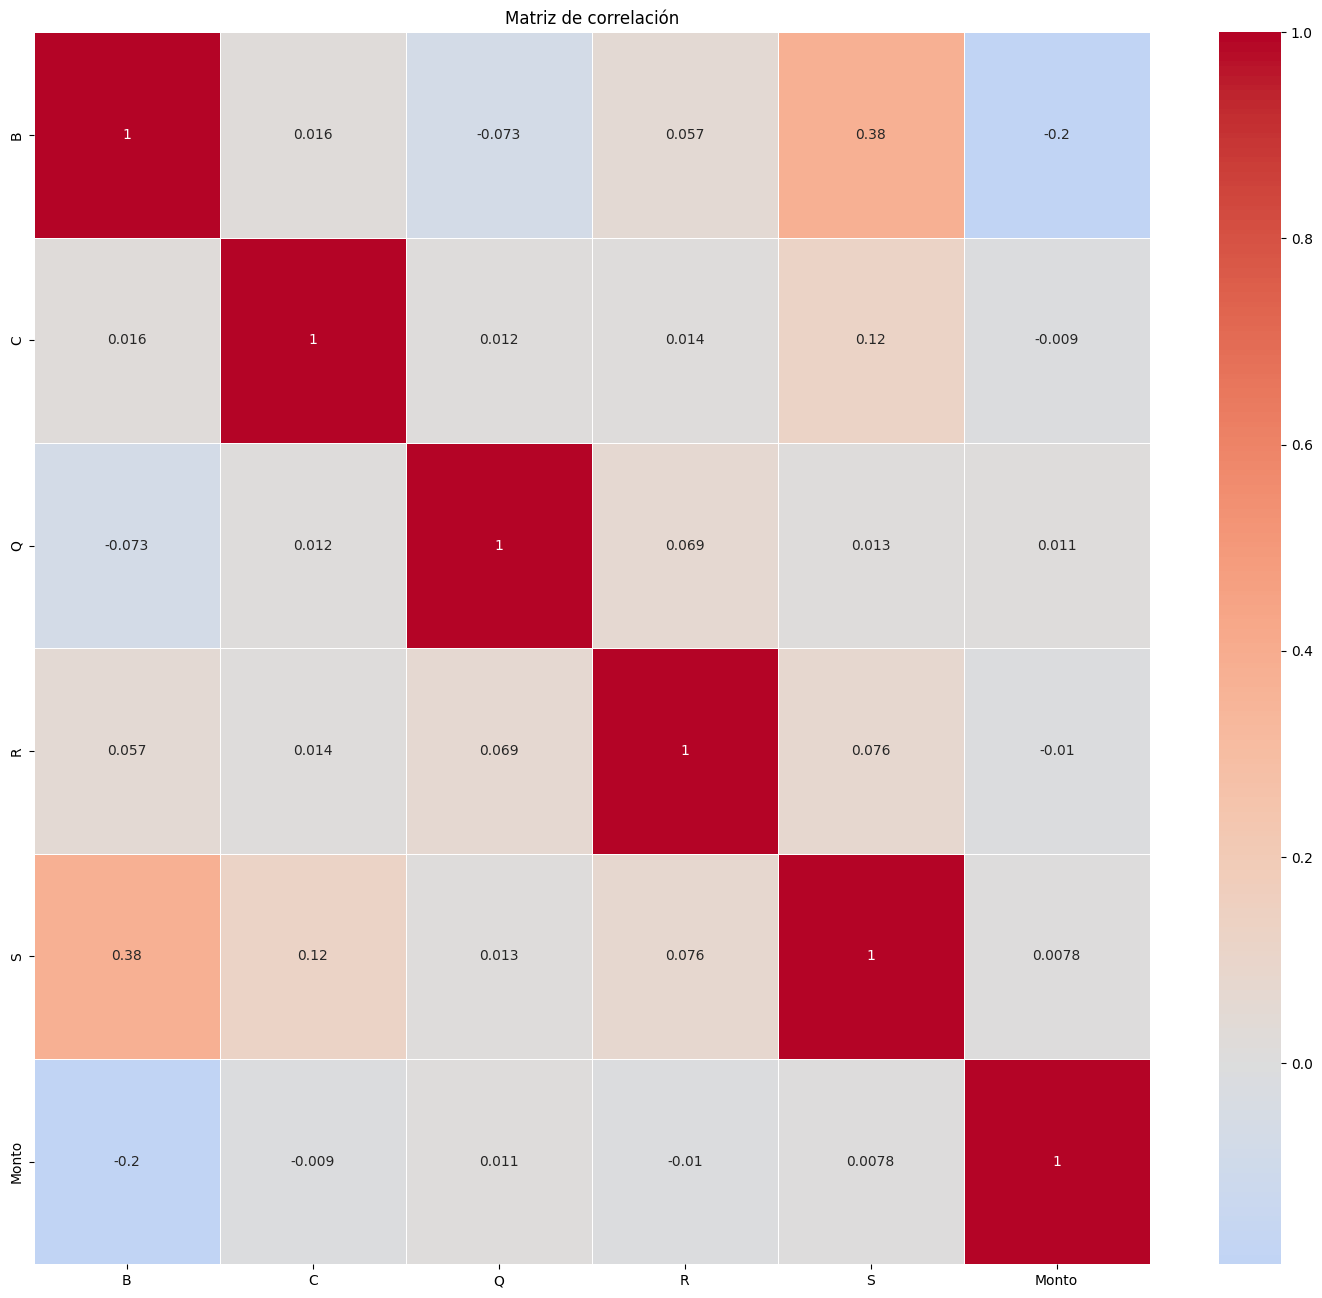

In [18]:
corr = matriz_datos[variables_continuas].corr()

plt.figure(figsize=(18,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

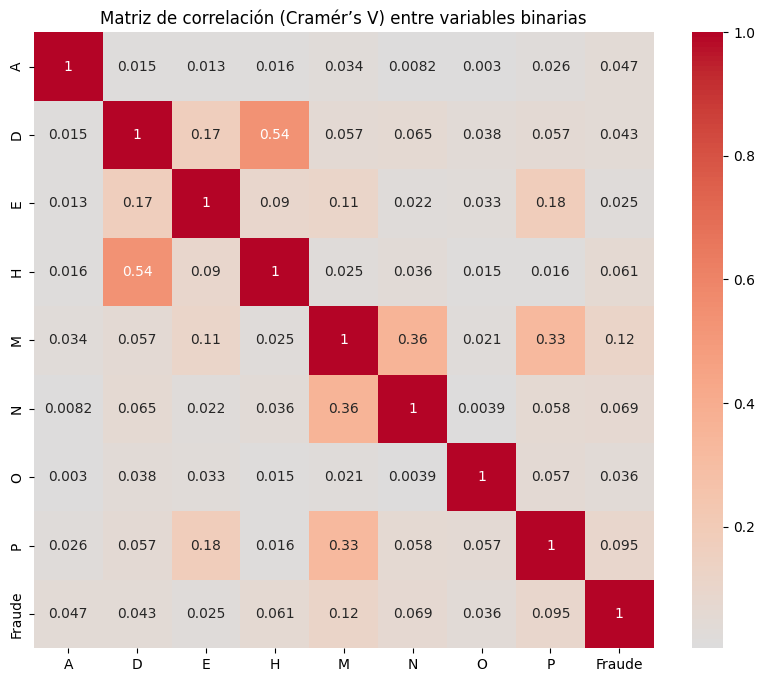

In [ ]:


# -------------------------------------------------------
# Función para calcular el Cramer's V entre dos variables
# -------------------------------------------------------
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency, correction=False)[0]
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


# -------------------------------------------------------
# Calcular matriz de correlación por Chi² (Cramer's V)
# -------------------------------------------------------
variables = matriz_datos.drop(columns=['J', *variables_continuas]).columns
n = len(variables)

cramers_matrix = pd.DataFrame(np.zeros((n, n)), columns=variables, index=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            cramers_matrix.loc[var1, var2] = cramers_v(matriz_datos[var1], matriz_datos[var2])
        else:
            cramers_matrix.loc[var1, var2] = 1.0

# -------------------------------------------------------
# Visualizar con un heatmap
# -------------------------------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (Cramér’s V) entre variables binarias")
plt.show()


In [27]:
df_datos

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10.0,50257.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10.0,29014.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7.0,92.0,0,1,0.000,0.0,0,1,UY,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16.0,50269.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8.0,8180.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3.0,63302.0,0,1,0.500,0.0,0,0,BR,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12.0,825.0,0,0,0.000,0.0,0,0,BR,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3.0,81067.0,0,0,0.000,0.0,0,0,BR,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9.0,398372.0,0,0,0.000,0.0,0,0,BR,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


In [47]:
def tabla_contingencia(df:pd.DataFrame, var1: str, var2:str):
    df_total=pd.crosstab(
        df[var1],
        df[var2],
        margins=True,
        margins_name='Total'
    ).iloc[:, -1]
    
    df_porcentajes=(pd.crosstab(
        df[var1],
        df[var2],
        margins=True,
        margins_name='Total',
        normalize='index'
    )*100).round(1)

    df_resultado=pd.concat([df_porcentajes, df_total], axis=1)
    print(df_resultado.sort_values('Total', ascending=False))

In [52]:
df_temp=matriz_datos[['D', 'H', 'Fraude']].copy()
df_temp['DxH']=df_temp['D']*df_temp['H']

tabla_contingencia(df_temp, 'DxH', 'Fraude')

          0     1  Total
DxH                     
Total  72.7  27.3  16880
0      73.0  27.0  16597
1      51.9  48.1    283


In [53]:
tabla_contingencia(matriz_datos, 'D', 'H')

           0     1  Total
D                        
Total   98.3   1.7  16880
0      100.0   0.0  15935
1       70.1  29.9    945


In [48]:
tabla_contingencia(matriz_datos[matriz_datos['Fraude']==0], 'D', 'H')

           0     1  Total
D                        
Total   98.8   1.2  12269
0      100.0   0.0  11657
1       76.0  24.0    612


In [49]:
tabla_contingencia(matriz_datos[matriz_datos['Fraude']==1], 'D', 'H')

           0     1  Total
D                        
Total   97.1   2.9   4611
0      100.0   0.0   4278
1       59.2  40.8    333


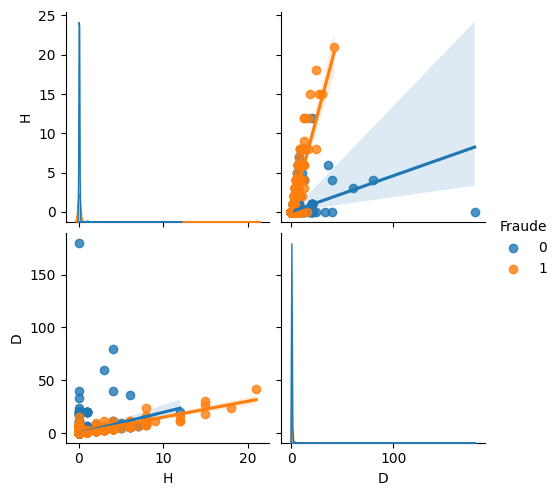

In [41]:
sns.pairplot(df_datos[['H', 'D', 'Fraude']], hue='Fraude', kind='reg')

In [39]:
df_datos[df_datos['D']<100][['H', 'D', 'Fraude']].corr()

,H,D,Fraude
H,1.000000,0.579746,0.064361
D,0.579746,1.000000,0.029014
Fraude,0.064361,0.029014,1.000000


In [21]:
def pde_categorica(df, var_categorica, df_var_dependiente):
  df = pd.concat([df[var_categorica], df_var_dependiente], axis=1)
  df=pd.concat([df.groupby([df.columns.values[0]], as_index=False)[df.columns.values[1]].count(),
                df.groupby([df.columns.values[0]], as_index=False)[df.columns.values[1]].mean()], axis=1)
  df=df.iloc[:, [0,1,3]]
  df.columns=[df.columns.values[0], 'observaciones', 'prop_bueno']
  df['proporcion_obs']=df['observaciones']/df['observaciones'].sum()
  df['n_buenos']=df['prop_bueno']*df['observaciones']
  df['n_malos']=(1-df['prop_bueno'])*df['observaciones']
  df['prop_n_buenos']=df['n_buenos']/df['n_buenos'].sum()
  df['prop_n_malos']=df['n_malos']/df['n_malos'].sum()
  df['PdE']=np.log(df['prop_n_buenos']/df['prop_n_malos'])
  df=df.sort_values('PdE')
  df=df.reset_index(drop=True)
  df['delta_prop_n_buenos']=df['prop_n_buenos'].diff().abs()
  df['delta_PdE']=df['PdE'].diff().abs()
  df['VI']=(df['prop_n_buenos']-df['prop_n_malos'])*df['PdE']
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df['sumatioriaVI']=df['VI'].sum()
  return df

In [ ]:
df_prueba=pde_categorica(matriz_datos.drop(columns='Fraude'), 'M', matriz_datos['Fraude'])
df_prueba=df_prueba.sort_values('M')
df_prueba

,M,observaciones,prop_bueno,proporcion_obs,n_buenos,n_malos,prop_n_buenos,prop_n_malos,PdE,delta_prop_n_buenos,delta_PdE,VI,sumatioriaVI
0,0,11344,0.236248,0.672038,2680.0,8664.0,0.581219,0.70617,-0.194729,NaN,NaN,0.024332,0.068608
1,1,5536,0.348808,0.327962,1931.0,3605.0,0.418781,0.29383,0.354347,0.162438,0.549076,0.044276,0.068608


In [ ]:
def grafico_pde(df):
  x=np.array(df.iloc[:, 0].apply(str))
  y=df['PdE']
  plt.figure(figsize=(20, 10))
  plt.plot(x, y, marker='x', linestyle='--', color='blue')
  plt.xlabel(df.columns[0],size=25)
  plt.ylabel("Peso de la Evidencia (PdE)",size=25)
  plt.title(str('Peso de la Evidencia por ' + df.columns[0]),size=25)

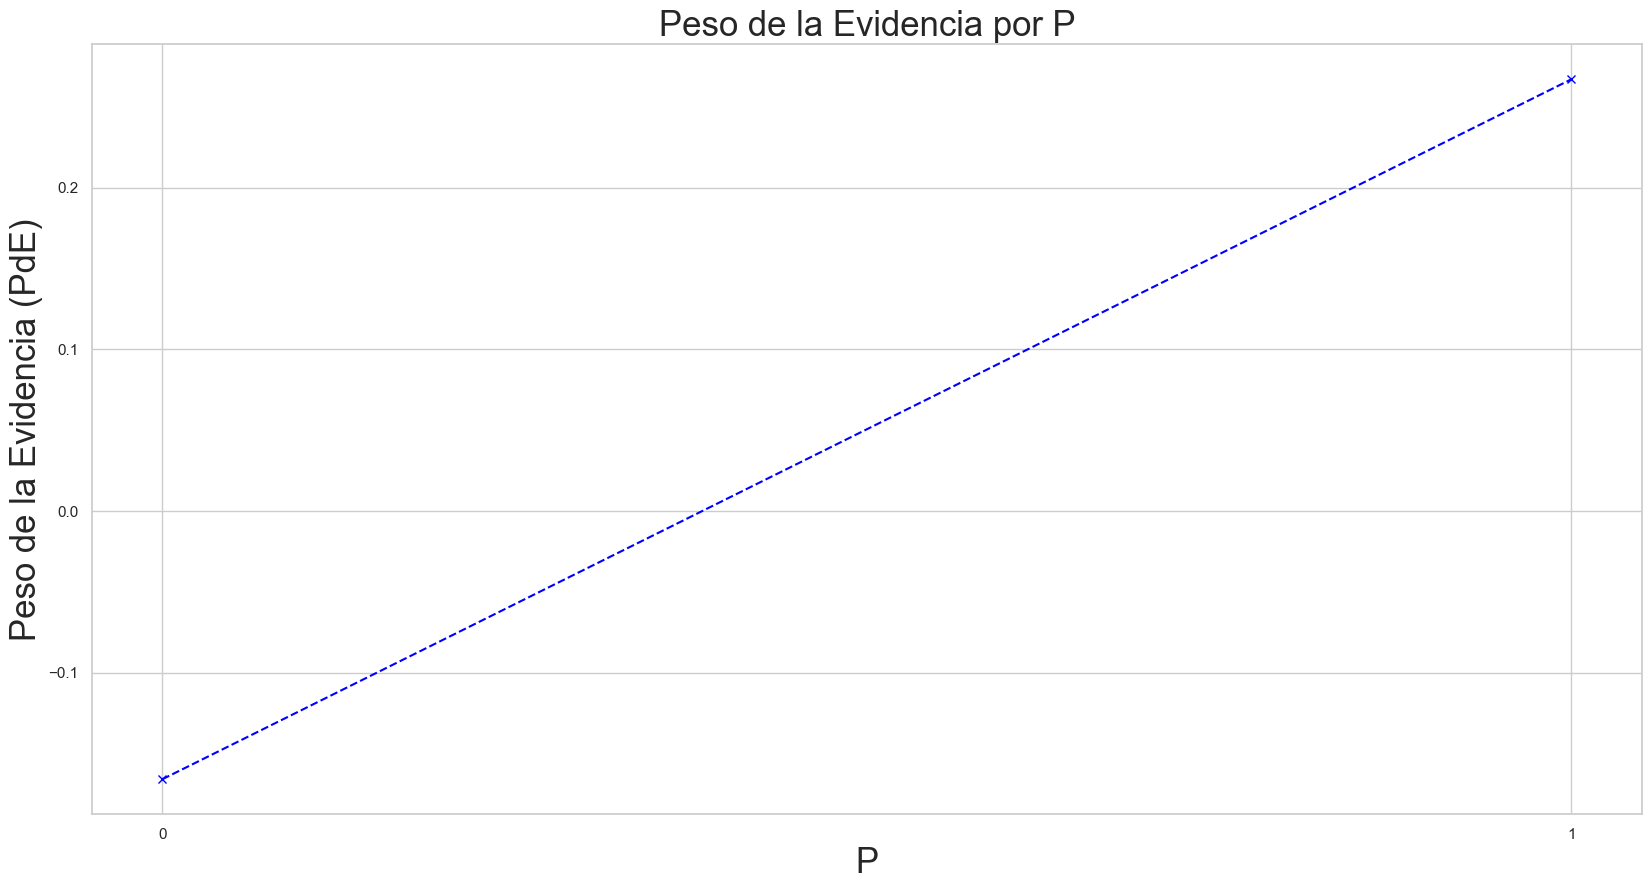

In [ ]:
grafico_pde(df_prueba)

In [ ]:
def pde_continua(df, var_categorica, df_var_dependiente):
  df = pd.concat([df[var_categorica], df_var_dependiente], axis=1)
  df=pd.concat([df.groupby([df.columns.values[0]], as_index=False)[df.columns.values[1]].count(),
                df.groupby([df.columns.values[0]], as_index=False)[df.columns.values[1]].mean()], axis=1)
  df=df.iloc[:, [0,1,3]]
  df.columns=[df.columns.values[0], 'observaciones', 'prop_bueno']
  df['proporcion_obs']=df['observaciones']/df['observaciones'].sum()
  df['n_buenos']=df['prop_bueno']*df['observaciones']
  df['n_malos']=(1-df['prop_bueno'])*df['observaciones']
  df['prop_n_buenos']=df['n_buenos']/df['n_buenos'].sum()
  df['prop_n_malos']=df['n_malos']/df['n_malos'].sum()
  df['PdE']=np.log(df['prop_n_buenos']/df['prop_n_malos'])
  # df=df.sort_values('PdE')
  # df=df.reset_index(drop=True)
  df['delta_prop_n_buenos']=df['prop_n_buenos'].diff().abs()
  df['delta_PdE']=df['PdE'].diff().abs()
  df['VI']=(df['prop_n_buenos']-df['prop_n_malos'])*df['PdE']
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df['sumatioriaVI']=df['VI'].sum()
  return df

def grafico_pde(df):
  x=np.array(df.iloc[:, 0].apply(str))
  y=df['PdE']
  plt.figure(figsize=(20, 10))
  plt.plot(x, y, marker='x', linestyle='--', color='blue')
  plt.xlabel(df.columns[0],size=25)
  plt.ylabel("Peso de la Evidencia (PdE)",size=25)
  plt.title(str('Peso de la Evidencia por ' + df.columns[0]),size=25)

In [ ]:
df=pde_categorica(df_datos.drop(columns='Fraude'), 'M', df_datos['Fraude'])
df=df.sort_values('M')
df

,M,observaciones,prop_bueno,proporcion_obs,n_buenos,n_malos,prop_n_buenos,prop_n_malos,PdE,delta_prop_n_buenos,delta_PdE,VI,sumatioriaVI
1,1,11344,0.236248,0.672038,2680.0,8664.0,0.581219,0.706170,-0.194729,0.581002,0.906082,0.024332,0.079248
4,2,3448,0.325116,0.204265,1121.0,2327.0,0.243114,0.189665,0.248272,0.229451,0.060980,0.013270,0.079248
6,3,1308,0.392966,0.077488,514.0,794.0,0.111473,0.064716,0.543771,0.104099,0.064131,0.025425,0.079248
8,4,386,0.427461,0.022867,165.0,221.0,0.035784,0.018013,0.686414,0.034049,0.113248,0.012198,0.079248
3,5,202,0.311881,0.011967,63.0,139.0,0.013663,0.011329,0.187292,0.010627,0.207190,0.000437,0.079248
5,6,90,0.377778,0.005332,34.0,56.0,0.007374,0.004564,0.479640,0.235741,0.231368,0.001347,0.079248
2,7,52,0.269231,0.003081,14.0,38.0,0.003036,0.003097,-0.019898,0.578183,0.174831,0.000001,0.079248
7,8,20,0.400000,0.001185,8.0,12.0,0.001735,0.000978,0.573166,0.109738,0.029395,0.000434,0.079248
9,9,20,0.500000,0.001185,10.0,10.0,0.002169,0.000815,0.978631,0.033615,0.292217,0.001325,0.079248
0,10,9,0.111111,0.000533,1.0,8.0,0.000217,0.000652,-1.100811,NaN,NaN,0.000479,0.079248


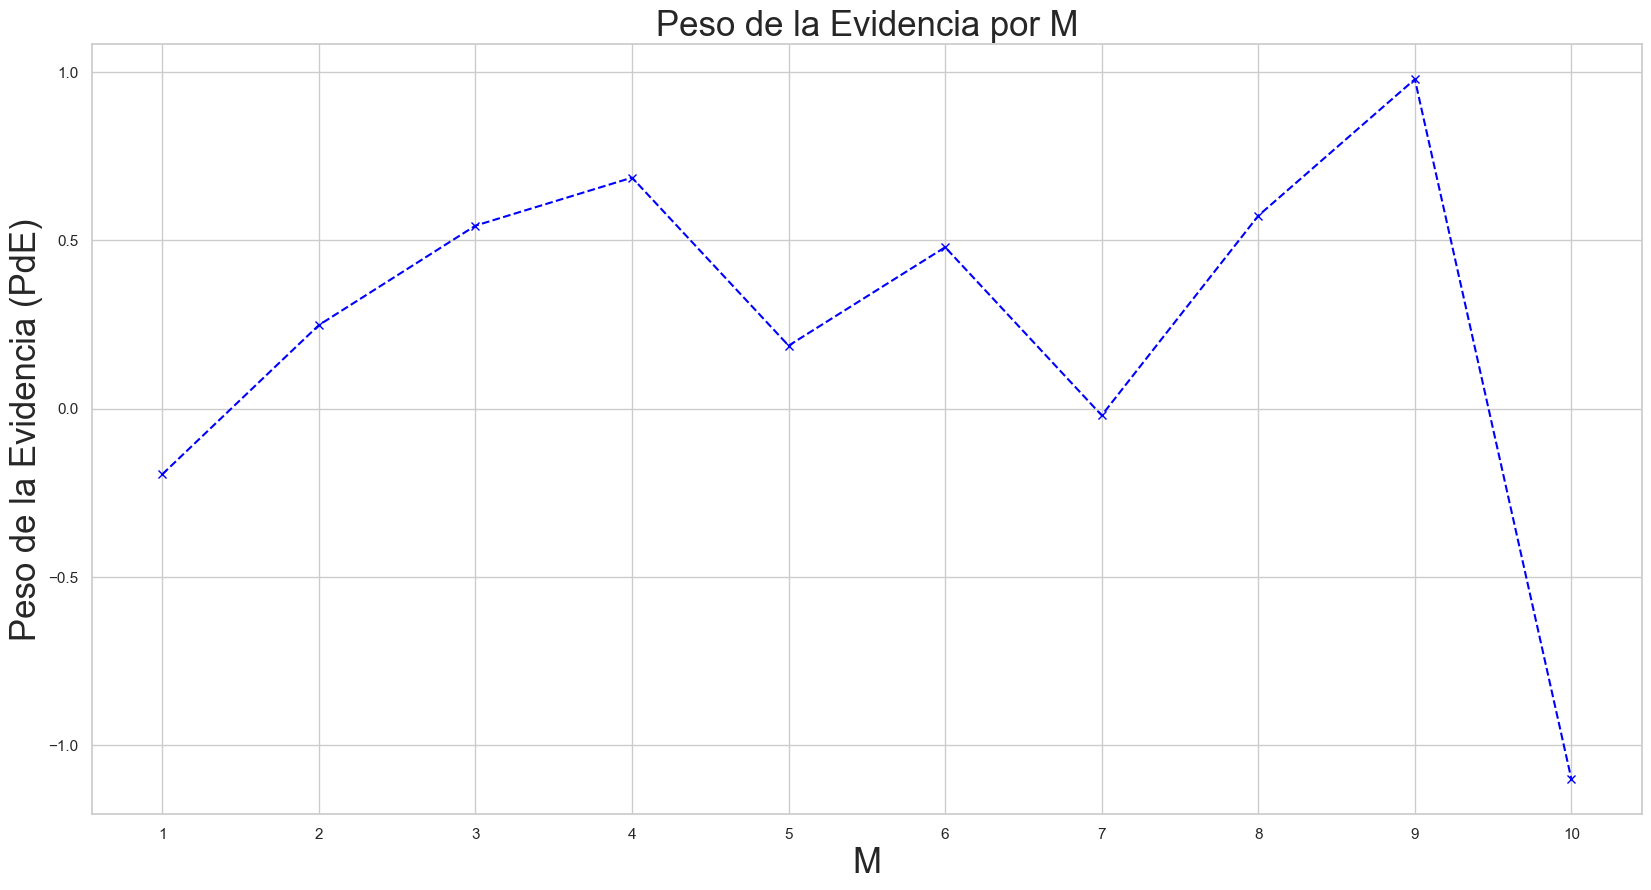

In [ ]:
grafico_pde(df)

In [ ]:
file_path

'C:\\Users\\EXNOAANIETO\\Documents\\NOVAVENTA_ANALITICA\\tutorials\\data\\MercadoLibre.csv'

In [ ]:
df_datos.to_csv('C:\\Users\\EXNOAANIETO\\Documents\\NOVAVENTA_ANALITICA\\tutorials\\data\\MercadoLibre2.csv',
                 decimal='.', 
                 sep=';')